# ST4 Enseignement Integration
Accessing the HiggsML challenge dataset. See the accompanying document for details

In [ ]:
COLAB=True # if running on Colab
#COLAB=False # if running locally

In [ ]:
if COLAB:
    #### Reading file from Google Drive
    !pip install PyDrive
    !pip install h5py
    !pip install eli5
    import os
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

In [ ]:
# download dataset 

if COLAB:
    download = drive.CreateFile({'id': '1P_IEO3wxj8tSlURMDpNOZX3L65r9Gtgi'})
    download.GetContentFile("atlas-higgs-challenge-2014-v2-s0_e500000.csv.gz")




!ls -lrt

total 24948
drwxr-xr-x 1 root root     4096 Jun 10 16:28 sample_data
-rw-r--r-- 1 root root     2676 Jun 11 19:43 adc.json
drwx------ 4 root root     4096 Jun 11 20:03 drive
-rw-r--r-- 1 root root    15922 Jun 11 20:44 Score_nn_Hist.pdf
-rw-r--r-- 1 root root    24515 Jun 11 20:44 ROC.pdf
-rw-r--r-- 1 root root    14561 Jun 11 20:45 Significance_curve.pdf
-rw-r--r-- 1 root root 25476412 Jun 11 21:15 atlas-higgs-challenge-2014-v2-s0_e500000.csv.gz


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from IPython import display
from IPython.display import display, HTML
%matplotlib inline
import time
pd.set_option('display.max_columns', None) # to see all columns of df.head()
np.random.seed(31415) # set the random seed

## load signal, background data

In [ ]:
#fulldata=pd.read_csv("atlas-higgs-challenge-2014-v2-s0_e500000.csv.gz")
fulldata=pd.read_csv("/content/drive/My Drive/NN/PRI_DER_EI_2.csv")

display(fulldata.head(10))
fulldata.columns

,Unnamed: 0,EventId,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,detailLabel,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality
0,0,100000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.001333,1.0,2,51.661920,97.805548,27.947400,0.910,17.128559,2.666000,3.064239,197.761,1.581776,1.339953,0.221643
1,1,100001,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,1.114509,0.0,400,68.783298,103.222163,48.122970,0.000,0.000000,0.000000,3.473102,125.158,0.878707,-1.117169,0.368578
2,2,100002,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,1.171295,0.0,400,162.174512,125.922302,35.625939,0.000,0.000000,0.000000,3.154763,197.814,3.775860,10.571668,0.371607
3,3,100003,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,2.717621,0.0,400,81.417024,80.945997,0.416824,0.000,0.000000,0.000000,3.309953,75.968,2.354440,-24.107324,0.000000
4,4,100004,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,3.116281,0.0,400,16.911571,134.745256,16.409958,0.000,0.000000,0.000000,4.838391,57.983,1.055479,-1.182469,0.000000
5,5,100005,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.041622,0.0,135,13.544226,59.140014,116.351002,2.636,22.564146,0.540288,1.361547,278.876,0.588339,-0.549904,0.782926
6,6,100006,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.001333,1.0,2,28.880192,107.778514,106.126999,0.733,13.109212,0.113184,3.403303,305.967,3.370537,-1.747049,0.826474
7,7,100007,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.009362,1.0,0,10.400318,94.712306,29.162601,0.000,0.000000,0.000000,2.897782,138.178,0.364721,-3.000688,0.366454
8,8,100008,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,2.642587,0.0,400,50.568130,100.966924,4.293899,0.000,0.000000,0.000000,4.943965,65.333,0.674862,-1.234473,0.000000
9,9,100009,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.000754,1.0,3,88.933447,69.226161,193.395312,0.000,0.000000,0.000000,1.607905,255.123,0.599166,0.497870,0.364037


Index(['Unnamed: 0', 'EventId', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label', 'detailLabel', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

In [ ]:
fulldata.describe()

,Unnamed: 0,EventId,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,detailLabel,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,349999.500000,38.714545,-0.013257,-0.011970,46.674137,-0.019437,0.047620,41.701531,-0.008731,209.927965,0.979556,-348.752703,-399.691392,-399.699610,-691.888913,-708.680697,-708.681274,73.165734,0.823212,0.34179,203.420608,49.292574,81.138727,57.874472,0.698745,4.837207,0.748411,2.834659,158.554416,1.438127,-0.003122,0.262181
std,144337.711634,144337.711634,22.446292,1.213545,1.816473,22.105907,1.264858,1.814938,32.710333,1.811627,126.905884,0.978462,533.104931,489.427615,489.420984,480.144630,453.589257,453.588092,98.390870,0.936718,0.47431,178.763815,35.440416,40.578729,63.536256,1.440224,8.678956,1.835135,1.141499,116.136301,0.845757,5.677077,0.310109
min,0.000000,100000.000000,20.000000,-2.499000,-3.142000,26.000000,-2.508000,-3.142000,0.089000,-3.141000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000754,0.00000,0.000000,0.000000,6.196578,0.001267,0.000000,0.000000,0.000000,0.208396,46.104000,0.047409,-627.883194,0.000000
25%,124999.750000,224999.750000,24.589000,-0.928000,-1.582000,32.385000,-1.012000,-1.516000,21.386000,-1.573000,123.077750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.009362,0.00000,1.000000,19.321070,59.387412,14.062552,0.000000,0.000000,0.000000,1.974997,77.478000,0.884469,-1.256096,0.000000
50%,249999.500000,349999.500000,31.785000,-0.025000,-0.038000,40.533000,-0.043000,0.092000,34.815000,-0.022000,179.795500,1.000000,38.981000,-1.867500,-2.105000,-999.000000,-999.000000,-999.000000,40.496000,0.582373,0.00000,132.000000,46.556279,73.732314,38.474114,0.000000,0.000000,0.000000,2.856012,120.611000,1.280645,-0.008657,0.178934
75%,374999.250000,474999.250000,44.955000,0.898000,1.561000,53.379000,0.957000,1.617000,51.929000,1.558000,263.767000,2.000000,75.491000,0.429000,0.494000,33.771250,-2.447000,-2.271000,110.324000,1.199707,1.00000,400.000000,73.642553,92.202825,79.164753,0.496000,9.111528,0.243963,3.580877,200.841000,1.777535,1.255967,0.369656
max,499999.000000,599999.000000,764.408000,2.499000,3.142000,701.328000,2.506000,3.142000,2842.617000,3.141000,2190.275000,3.000000,1163.439000,4.499000,3.142000,817.801000,4.500000,3.142000,1860.175000,3.904958,1.00000,400.000000,968.668711,1349.475735,2834.997966,8.724000,61.833907,19.012644,7.490158,2079.162000,32.228666,1178.662458,1.000000


In [ ]:
print ("Normalization is already correct for the full 2012 LHC running. Background and signal.")
# in principle should multiply all the scaleFactor (then weights will vary event by event)
class_weights = (fulldata.query("Label==0").Weight.sum(), fulldata.query("Label==1").Weight.sum()) 
print("total class weights",class_weights)

class_nevents = (len(fulldata.query("Label==0")), len(fulldata.query("Label==1")))
print ("total class number of events",class_nevents)



Normalization is already correct for the full 2012 LHC running. Background and signal.
total class weights (410912.76426711, 693.2443108784654)
total class number of events (329105, 170895)


## Event selection

In [ ]:
print (fulldata.shape)
fulldata=fulldata.query("PRI_had_pt>22") # needed for technical reason
print (fulldata.shape)



(500000, 33)
(439494, 33)


In [ ]:
#DR replace dummy -999 by -7, for nicer plots
fulldata.replace(-999,-7,inplace=True)
fulldata.head()

,Unnamed: 0,EventId,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,detailLabel,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality
0,0,100000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.001333,1.0,2,51.661920,97.805548,27.947400,0.91,17.128559,2.666,3.064239,197.761,1.581776,1.339953,0.221643
1,1,100001,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-7.000,-7.00,-7.000,46.226,1.114509,0.0,400,68.783298,103.222163,48.122970,0.00,0.000000,0.000,3.473102,125.158,0.878707,-1.117169,0.368578
2,2,100002,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-7.000,-7.00,-7.000,44.251,1.171295,0.0,400,162.174512,125.922302,35.625939,0.00,0.000000,0.000,3.154763,197.814,3.775860,10.571668,0.371607
3,3,100003,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-7.000,-7.000,-7.000,-7.000,-7.00,-7.000,-0.000,2.717621,0.0,400,81.417024,80.945997,0.416824,0.00,0.000000,0.000,3.309953,75.968,2.354440,-24.107324,0.000000
4,4,100004,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-7.000,-7.000,-7.000,-7.000,-7.00,-7.000,0.000,3.116281,0.0,400,16.911571,134.745256,16.409958,0.00,0.000000,0.000,4.838391,57.983,1.055479,-1.182469,0.000000


In [ ]:
#WARNING : there should be no selection nor shuffling later on !

#hide label in separate vector
target = fulldata["Label"]
del fulldata["Label"]

#hide weight in separate vector
weights = fulldata["Weight"]
del fulldata["Weight"]

#remove unnecessary variable (save in separate DF just in case)
eventid = fulldata["EventId"]
del fulldata["EventId"]

detaillabel = fulldata["detailLabel"]
del fulldata["detailLabel"]


In [ ]:
#keep everything
data=fulldata.copy()
data.head()




,Unnamed: 0,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality
0,0,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,51.661920,97.805548,27.947400,0.91,17.128559,2.666,3.064239,197.761,1.581776,1.339953,0.221643
1,1,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-7.000,-7.00,-7.000,46.226,68.783298,103.222163,48.122970,0.00,0.000000,0.000,3.473102,125.158,0.878707,-1.117169,0.368578
2,2,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-7.000,-7.00,-7.000,44.251,162.174512,125.922302,35.625939,0.00,0.000000,0.000,3.154763,197.814,3.775860,10.571668,0.371607
3,3,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-7.000,-7.000,-7.000,-7.000,-7.00,-7.000,-0.000,81.417024,80.945997,0.416824,0.00,0.000000,0.000,3.309953,75.968,2.354440,-24.107324,0.000000
4,4,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-7.000,-7.000,-7.000,-7.000,-7.00,-7.000,0.000,16.911571,134.745256,16.409958,0.00,0.000000,0.000,4.838391,57.983,1.055479,-1.182469,0.000000


# Feature engineering, NN training, ROC curve, AUC, significance, etc....

<Figure size 432x288 with 0 Axes>

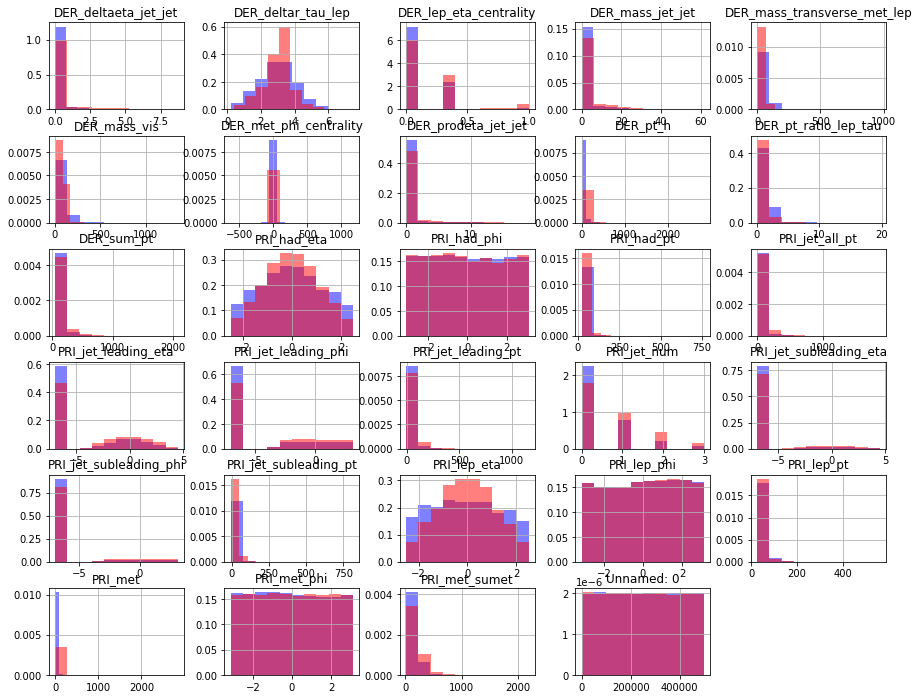

In [ ]:
plt.figure()

ax=data[target==0].hist(weights=weights[target==0],figsize=(15,12),color='b',alpha=0.5,density=True) #background
ax=ax.flatten()[:data.shape[1]] # to avoid error if holes in the grid of plots (like if 7 or 8 features)
data[target==1].hist(weights=weights[target==1],figsize=(15,12),color='r',alpha=0.5,density=True,ax=ax) #signal

plt.show() #plot signal and background distributions for each feature

print (data.shape)

##transformation feature

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_size = 0.75 # fraction of sample used for training

X_train, X_test, y_train, y_test, weights_train, weights_test = \
    train_test_split(data, target, weights, train_size=train_size)
#reset index for dataseries, not needed for ndarray (X_train, X_test)

y_train, y_test, weights_train, weights_test = \
    y_train.reset_index(drop=True),y_test.reset_index(drop=True), \
    weights_train.reset_index(drop=True), weights_test.reset_index(drop=True)

print (X_train.shape)
print (y_train.shape)
print (weights_train.shape)
print (X_test.shape)
print (y_test.shape)
print (weights_test.shape)



#scale to mean 0 and variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # applied the transformation calculated the line above

#normalizing data with weights
class_weights_train = (weights_train[y_train == 0].sum(), weights_train[y_train == 1].sum())

print ("class_weights_train:",class_weights_train)
for i in range(len(class_weights_train)):
    weights_train[y_train == i] *= max(class_weights_train)/ class_weights_train[i] #equalize number of background and signal event
    weights_test[y_test == i] *= 1/(1-train_size) # increase test weight to compensate for sampling
    
print ("Test : total weight sig", weights_test[y_test == 1].sum())
print ("Test : total weight bkg", weights_test[y_test == 0].sum())
print ("Train : total weight sig", weights_train[y_train == 1].sum())
print ("Train : total weight bkg", weights_train[y_train == 0].sum())


(329620, 29)
(329620,)
(329620,)
(109874, 29)
(109874,)
(109874,)
class_weights_train: (247981.25290421143, 495.3095666137095)
Test : total weight sig 661.9422389423315
Test : total weight bkg 329037.54309083754
Train : total weight sig 247981.2529042115
Train : total weight bkg 247981.25290421143


## Load significance function


In [ ]:
from math import sqrt
from math import log

def amsasimov(s,b): # asimov (or Poisson) significance
        if b<=0 or s<=0:
            return 0
        try:
            return sqrt(2*((s+b)*log(1+float(s)/b)-s))
        except ValueError:
            print(1+float(s)/b)
            print (2*((s+b)*log(1+float(s)/b)-s))
        #return s/sqrt(s+b)



##NN

### Hyperparameter tuning with grid search


In [ ]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
inputs = Input(shape=(X_train.shape[1],))


def create_model(optimizer="adam",activation="relu",nb_hidden_layers=5,nnwidth=145,ridge=1e-6, dropout_rate=0):
  D = keras.Sequential()
  D.add(Dense(nnwidth,activation=activation,activity_regularizer=regularizers.l2(ridge)))
  for i in range(nb_hidden_layers):
    D.add(Dense(nnwidth,activation=activation,activity_regularizer=regularizers.l2(ridge)))
    D.add(Dropout(dropout_rate))
  D.add(Dense(1,activation="sigmoid"))
  D.compile(loss="binary_crossentropy", optimizer=optimizer)
  return D

#define a Keras model to apply GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

#chose the hyperparameter to optimize
param_grid = {"nb_hidden_layers":range(5,12)}
#HPO number of neurones nnwidth, activation function, etc....

gsearch1 = GridSearchCV(estimator = model,param_grid = param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=2)
gsearch1.fit(X_train,y_train, weights_train)

print ("Best value of parameter = ", gsearch1.best_params_)
print ("Best score = ", gsearch1.best_score_)

y_pred_gs = gsearch1.predict_proba(X_test)[:,1]
roc_auc_score(y_true=y_test, y_score=y_pred_gs, sample_weight=weights_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best value of parameter =  {'nb_hidden_layers': 6}
Best score =  0.8434368792812634


### NN training


In [ ]:
D = create_model()

# train the NN
starting_time = time.time( )
D.fit(X_train, y_train.values, epochs=13, verbose=0, class_weight=class_weights)
training_time = time.time( ) - starting_time
print("Training time:",training_time)

#compute auc of test and training data
y_pred_keras = D.predict(X_test)
y_pred_keras = y_pred_keras.ravel()
y_pred_train_keras = D.predict(X_train).ravel()
auc_test_keras = roc_auc_score(y_true=y_test, y_score=y_pred_keras)
auc_train_keras = roc_auc_score(y_true=y_train.values, y_score=y_pred_train_keras,)
print("auc test:",auc_test_keras)
print ("auc train:",auc_train_keras)
int_pred_test_sig_keras = [weights_test[(y_test ==1) & (y_pred_keras > th_cut)].sum() for th_cut in np.linspace(0,1,num=50)]
int_pred_test_bkg_keras = [weights_test[(y_test ==0) & (y_pred_keras > th_cut)].sum() for th_cut in np.linspace(0,1,num=50)]

#compute significance
vamsasimov_keras = [amsasimov(sumsig,sumbkg) for (sumsig,sumbkg) in zip(int_pred_test_sig_keras,int_pred_test_bkg_keras)]
significance_keras = max(vamsasimov_keras) 
Z = significance_keras
print("Z:",Z)

Training time: 411.8937871456146
auc test: 0.9033094694356287
auc train: 0.9106690943953716
Z: 3.3439776504613765


## Feature importance

In [ ]:
if True:  
    import eli5
    from eli5.sklearn import PermutationImportance
    from keras.wrappers.scikit_learn import KerasRegressor

    # Prmutation Features test using PermutationImportance function on a trained model
    perm = PermutationImportance(gsearch1, random_state=0, scoring="roc_auc").fit(X_test, y_test, sample_weight=weights_test.values)
    
    print ("Permutation importances")
    display(eli5.show_weights(perm, feature_names = data.columns.values))
    'file.close()'

Permutation importances


Weight,Feature
0.1330 ± 0.0032,PRI_lep_phi
0.1209 ± 0.0015,PRI_lep_eta
0.1129 ± 0.0013,PRI_had_eta
0.0965 ± 0.0013,PRI_jet_leading_pt
0.0929 ± 0.0030,PRI_had_phi
0.0797 ± 0.0004,PRI_had_pt
0.0690 ± 0.0021,PRI_met
0.0667 ± 0.0008,PRI_jet_leading_eta
0.0526 ± 0.0016,PRI_lep_pt
0.0424 ± 0.0012,PRI_met_phi


# Save/Load the NN

In [ ]:
# serialize model to JSON
model_json = D.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
D.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


# Score

In [ ]:
# some utilities
from math import sqrt
from math import log

# Plot score for signal and background, comparing training and testing
def compare_train_test(y_pred_train, y_train, y_pred, y_test, high_low=(0,1), bins=30, xlabel="", ylabel="Arbitrary units", title="", weights_train=np.array([]), weights_test=np.array([])):
    if weights_train.size != 0:
        weights_train_signal = weights_train[y_train == 1]
        weights_train_background = weights_train[y_train == 0]
    else:
        weights_train_signal = None
        weights_train_background = None
    plt.hist(y_pred_train[y_train == 1],
                 color='r', alpha=0.5, range=high_low, bins=bins,
                 histtype='stepfilled', density=True,
                 label='S (train)', weights=weights_train_signal) # alpha is transparancy
    plt.hist(y_pred_train[y_train == 0],
                 color='b', alpha=0.5, range=high_low, bins=bins,
                 histtype='stepfilled', density=True,
                 label='B (train)', weights=weights_train_background)

    if weights_test.size != 0:
        weights_test_signal = weights_test[y_test == 1]
        weights_test_background = weights_test[y_test == 0]
    else:
        weights_test_signal = None
        weights_test_background = None
    hist, bins = np.histogram(y_pred[y_test == 1],
                                  bins=bins, range=high_low, density=True, weights=weights_test_signal)
    scale = len(y_pred[y_test == 1]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    #width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='S (test)')

    hist, bins = np.histogram(y_pred[y_test == 0],
                                  bins=bins, range=high_low, density=True, weights=weights_test_background)
    scale = len(y_pred[y_test == 0]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    #width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='B (test)')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')

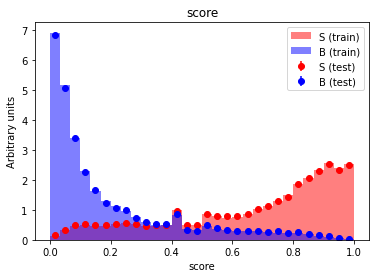

In [ ]:
#plot score distribution
compare_train_test(y_pred_train_keras, y_train, y_pred_keras, y_test, xlabel="score", title="score", weights_train=weights_train.values, weights_test=weights_test.values)
plt.savefig("Score_nn_Hist.pdf")
plt.show()


# CURVES

## ROC Curve

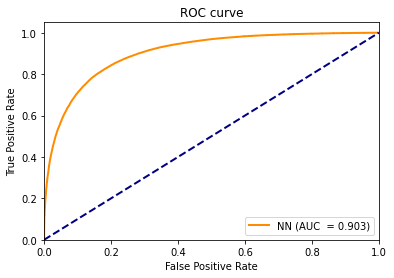

In [ ]:
from sklearn.metrics import roc_curve
lw = 2

#plot ROC curve
fpr_keras,tpr_keras,_ = roc_curve(y_true=y_test, y_score=y_pred_keras,)#,sample_weight=weights_test.values)
plt.plot(fpr_keras, tpr_keras, color='darkorange',lw=lw, label='NN (AUC  = {})'.format(np.round(auc_test_keras,decimals=3)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.savefig("ROC.pdf")
plt.show() # blue line = random classification -> maximize true positive rate while miniize false positive rate

## NN significance


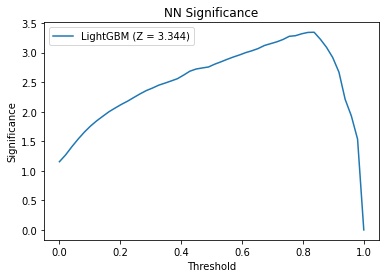

In [ ]:
#plot significance as a function of threshold 
plt.plot(np.linspace(0,1,num=50),vamsasimov_keras, label='NN (Z = {})'.format(np.round(significance_keras,decimals=3)))


plt.title("NN Significance")
plt.xlabel("Threshold")
plt.ylabel("Significance")
plt.legend()
plt.savefig("Significance_curve.pdf")
plt.show()

## 3D HPO graph

In [ ]:
#Calculating values

list_depth=[4,5,6,7,8] #list of depth to be used
list_width=[125,130,135,140,145,150,155] #list of width to be used
list_significance=[]
list_auc_test=[]
list_auc_train=[]
for i in range(len(list_depth)):
  y_significance = []
  for j in range(len(list_width)):
    Z = 0
    for _ in range(3): #Mean over 3 points
      D = create_model(nb_hidden_layers=list_depth[i],nnwidth=list_width[j],ridge=1e-6,optimizer="adam",activation="relu")
      D.fit(X_train, y_train.values, epochs=2, verbose=0, class_weight=class_weights)

      y_pred_keras = D.predict(X_test)
      y_pred_keras = y_pred_keras.ravel()
      y_pred_train_keras = D.predict(X_train).ravel()
      list_auc_test.append(roc_auc_score(y_true=y_test, y_score=y_pred_keras))
      list_auc_train.append(roc_auc_score(y_true=y_train.values, y_score=y_pred_train_keras,))

      int_pred_test_sig_keras = [weights_test[(y_test ==1) & (y_pred_keras > th_cut)].sum() for th_cut in np.linspace(0,1,num=50)]
      int_pred_test_bkg_keras = [weights_test[(y_test ==0) & (y_pred_keras > th_cut)].sum() for th_cut in np.linspace(0,1,num=50)]

      vamsasimov_keras = [amsasimov(sumsig,sumbkg) for (sumsig,sumbkg) in zip(int_pred_test_sig_keras,int_pred_test_bkg_keras)]
      significance_keras = max(vamsasimov_keras)
      Z += significance_keras
    y_significance.append(Z/3)
  list_significance.append(y_significance)

array_significance = np.array(list_significance)
array_width, array_depth = np.meshgrid(list_width, list_depth)

In [ ]:
#creation of HPO curve
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(array_width, array_depth, new_significance, 50, cmap='viridis')
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('z')
ax.set_title('HPO')
plt.savefig("HPO.png")
plt.show()

In [ ]:
#B-Spline interpolation to smooth the curve
from scipy import interpolate
xnew, ynew = np.mgrid[60:160:20j,3:8:20j]
tck = interpolate.bisplrep(array_width, array_depth, new_significance, s=0.001)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#creation of HPO curve
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xnew, ynew, znew, 50, cmap='viridis')
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('z')
ax.set_title('HPO smoothed')
plt.savefig("HPO_smooth.png")
plt.show()

##Learning curve

In [ ]:
#store the significances for different train size
stored_significances=[]
with open("learning_curve_values.txt","w") as file :
  for _ in range(7):
    significances = []
    for train_size in np.arange(0.05,0.95,0.05):

        # compute the significance for a given train size

        X_train, X_test, y_train, y_test, weights_train, weights_test = \
        train_test_split(data, target, weights, train_size=train_size)
        y_train, y_test, weights_train, weights_test = \
        y_train.reset_index(drop=True),y_test.reset_index(drop=True), \
        weights_train.reset_index(drop=True), weights_test.reset_index(drop=True)
        
        #Normalize the data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)  # applied the transformation calculated the line above
        class_weights_train = (weights_train[y_train == 0].sum(), weights_train[y_train == 1].sum())
        for i in range(len(class_weights_train)):
            weights_train[y_train == i] *= max(class_weights_train)/ class_weights_train[i] #equalize number of background and signal event
            weights_test[y_test == i] *= 1/(1-train_size) # increase test weight to compensate for sampling
        class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
        inputs = Input(shape=(X_train.shape[1],))

        y_pred_gs = gsearch1.predict_proba(X_test)[:,1]
        roc_auc_score(y_true=y_test, y_score=y_pred_gs, sample_weight=weights_test)

        #create the model
        D = create_model()

        #train the model
        starting_time = time.time( )
        D.fit(X_train, y_train.values, epochs=10, verbose=0, class_weight=class_weights)
        training_time = time.time( ) - starting_time
        print("Training time:",training_time)

        #compute significance
        y_pred_keras = D.predict(X_test)
        y_pred_keras = y_pred_keras.ravel()
        y_pred_train_keras = D.predict(X_train).ravel()
        auc_test_keras = roc_auc_score(y_true=y_test, y_score=y_pred_keras)
        auc_train_keras = roc_auc_score(y_true=y_train.values, y_score=y_pred_train_keras,)
        int_pred_test_sig_keras = [weights_test[(y_test ==1) & (y_pred_keras > th_cut)].sum() for th_cut in np.linspace(0,1,num=50)]
        int_pred_test_bkg_keras = [weights_test[(y_test ==0) & (y_pred_keras > th_cut)].sum() for th_cut in np.linspace(0,1,num=50)]

        vamsasimov_keras = [amsasimov(sumsig,sumbkg) for (sumsig,sumbkg) in zip(int_pred_test_sig_keras,int_pred_test_bkg_keras)]
        significance_keras = max(vamsasimov_keras)
        Z = significance_keras
        significances.append(Z)

        #store significances in a text file
        file.write(str(significances))

  stored_significances.append(significances)
  print(stored_significances)


    



Training time: 22.083840131759644
auc test: 0.8810649830331754
auc train: 0.9326016605683434
Training time: 46.537999391555786
auc test: 0.8896887213727773
auc train: 0.9195623809082751
Training time: 72.7679374217987
auc test: 0.8925805122461588
auc train: 0.915020818314817
Training time: 99.08647394180298
auc test: 0.8955679417094887
auc train: 0.9124138521963367
Training time: 118.90437984466553
auc test: 0.8973779498151109
auc train: 0.9130585576947938
Training time: 141.57555961608887
auc test: 0.8971146396623276
auc train: 0.9098298451302643
Training time: 159.5743007659912
auc test: 0.8993286958676283
auc train: 0.9113637869447359
Training time: 179.26706290245056
auc test: 0.9012725877334877
auc train: 0.9112134502582032
Training time: 190.12798714637756
auc test: 0.9011981805134823
auc train: 0.9097639029362035
Training time: 240.67972993850708
auc test: 0.9010174570413136
auc train: 0.9097684098804792
Training time: 254.7525351047516
auc test: 0.9027883033953793
auc train: 0.

Text(0.5, 1.0, 'learning curve')

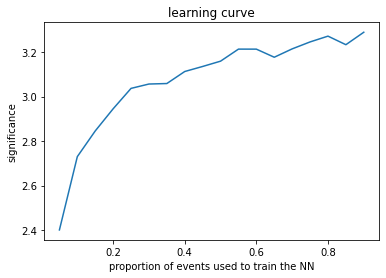

In [ ]:
# mean over 6 learning curves for the primary dataset
significances=[[2.3781342006818376, 2.688259946750193, 2.8577585074935254, 2.9492728336284797, 3.0748559129095137, 3.116226980535691, 3.0481027743901303, 3.1233386732509367, 3.0864431992022854, 3.113487736711292, 3.2431830301921414, 3.256339121821606, 3.140046604983066, 3.1228269824032684, 3.2186294115846663, 3.2936703388268467, 3.3253970870962064, 3.1496337249080137], [2.379825032992272, 2.6793275014582103, 2.8603765701461215, 3.004929124606621, 2.964441873247962, 2.981106226021941, 3.139948117796098, 3.1492034040556223, 3.1094679405164154, 3.208746368584682, 3.2540155101847925, 3.184079219953272, 3.204016492676037, 3.2925399810540705, 3.2373163684174497, 3.2364930334557633, 3.2457191753720753, 3.4903653246218656], [2.4773814708601667, 2.7682334431123956, 2.8859103525470116, 2.9033845388337944, 3.00714475338761, 3.024222360304106, 3.147536918372552, 3.1333838665699694, 3.156265594199236, 3.186348761746226, 3.2068321236477155, 3.142848146876199, 3.190548492717901, 3.298422613474659, 3.352426403219224, 3.3585239062050953, 3.127789287803989, 3.269457492468598],[2.4178992841395766, 2.7822803543752483, 2.8135154932713307, 2.8978084016807535, 3.0645089312366864, 3.123807887936437, 2.8375661403675605, 2.95406298509519, 3.214334345090409, 3.1594302391106464, 3.202862712177014, 3.303033984924646, 3.1331483759939425, 3.208736023340346, 3.1259402686605395, 3.309081835438942, 3.354134080983187, 3.329598425447501], [2.371930565192063, 2.72042724111, 2.766262922037796, 2.960457965324495, 3.1390078884935146, 3.0433622483477527, 3.036740983921582, 3.1478333175590767, 3.116025362779511, 3.1880329150032405, 3.2082839117888255, 3.139566668488182, 3.1916592011872, 3.1618155171706275, 3.2649754819346954, 3.2075378158915173, 3.30928251751385, 3.241791674219139], [2.3773046333165273, 2.74162429417331, 2.8896036719306206, 2.9555117905498256, 2.9726380503422987, 3.051477892428487, 3.1434801361395497, 3.170275943347857, 3.131609681080763, 3.1012115955643704, 3.167144679674801, 3.255926551794607, 3.2039767785586295, 3.204620576318864, 3.277211179539338, 3.2274018781122007, 3.039373115520972, 3.257032303565267]]
plt.plot(np.arange(0.05,0.95,0.05),np.mean(np.array(significances),axis=0))
plt.xlabel("proportion of events used to train the NN")
plt.ylabel("significance")
plt.title("learning curve")